In [9]:
import pandas as pd

import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import networkx as nx
import pickle


In [10]:
df=pd.read_csv('train.csv')
df.head()

,source_node,destination_node
0,1,690569
1,1,315892
2,1,189226
3,2,834328
4,2,1615927


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9437519 entries, 0 to 9437518
Data columns (total 2 columns):
 #   Column            Dtype
---  ------            -----
 0   source_node       int64
 1   destination_node  int64
dtypes: int64(2)
memory usage: 144.0 MB


In [12]:
df.shape

(9437519, 2)

In [13]:
df[df.isna().any(1)]

,source_node,destination_node


In [14]:
sum(df.duplicated())
 

0

### In this section will be using Networkx



#### NetworkX is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks(graphs).
https://networkx.org/



In [15]:
df.to_csv('train_woheader.csv',header=False,index=False)

In [16]:
g=nx.read_edgelist('train_woheader.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)


In [17]:
nx.info(g)

C:\Users\Admin\AppData\Local\Temp\ipykernel_13596\3034883828.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(g)


'DiGraph with 1862220 nodes and 9437519 edges'

####  Sub Graph


In [18]:
pd.read_csv('train.csv', nrows=50).to_csv('train_woheader_sample.csv',header=False,index=False)


In [19]:
subgraph=nx.read_edgelist('train_woheader_sample.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)

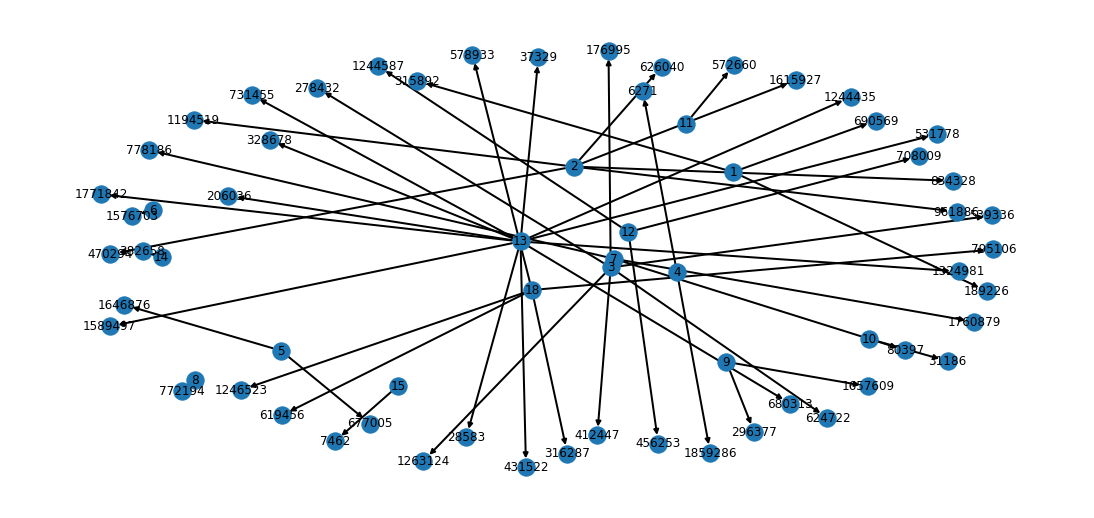

DiGraph with 66 nodes and 50 edges


C:\Users\Admin\AppData\Local\Temp\ipykernel_13596\485622944.py:8: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(subgraph))


In [20]:
fig = plt.figure(1, figsize=(15, 7))
pos=nx.spring_layout(subgraph)
nx.draw(subgraph,pos,width=2
        ,with_labels=True)

plt.savefig('graph_sample.pdf')
plt.show()
print(nx.info(subgraph))

## Exploratory Data Analysis

In [21]:
print(' No. of unique nodes (users) :',len(g.nodes()))

 No. of unique nodes (users) : 1862220


##### Indegree can be viewed as followers
###### Definition: The number of edges coming into a vertex in a directed graph. See also out-degree, source, degree. 

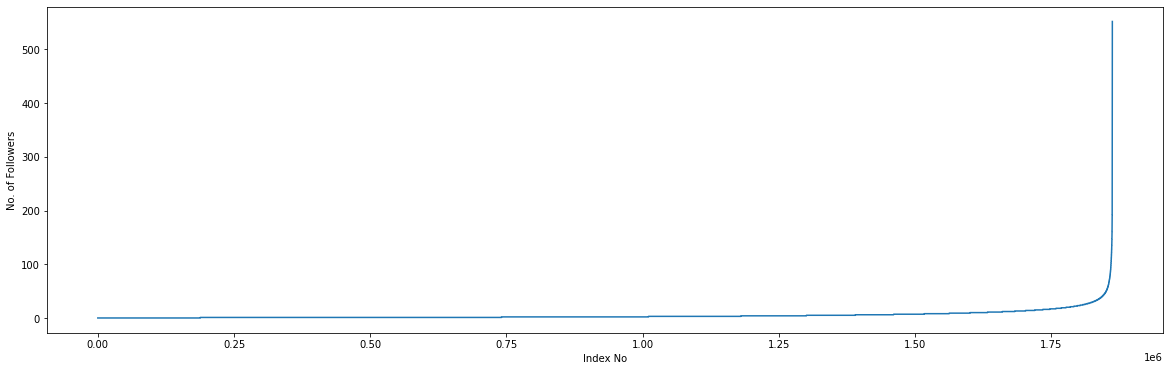

In [22]:
indegree=list(dict(g.in_degree()).values())
indegree.sort()
plt.figure(figsize=(20,6))
plt.plot(indegree)
plt.xlabel('Index No')
plt.ylabel('No. of Followers')
plt.show()



### Outdegree 
#####The number of edges directed out of a vertex in a directed graph.


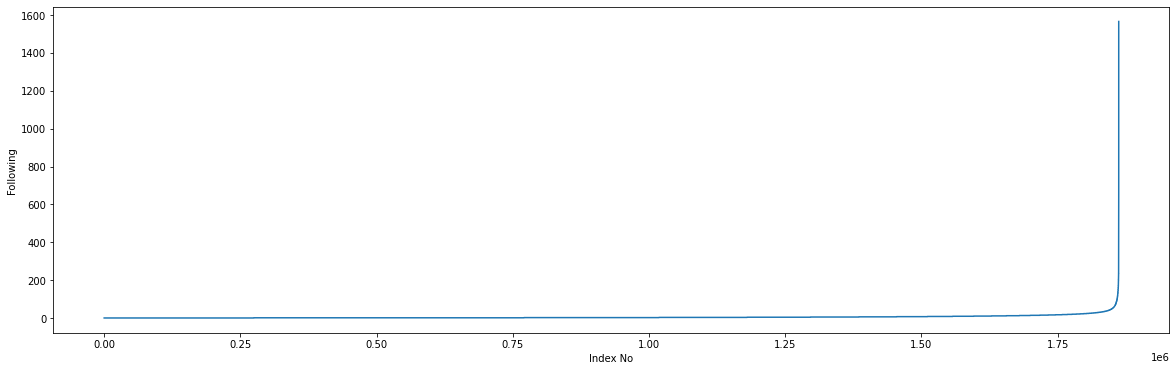

In [23]:
outdegree=list(dict(g.out_degree()
).values())
outdegree.sort()
plt.figure(figsize=(20,6))
plt.plot(outdegree)
plt.xlabel('Index No')
plt.ylabel('Following')
plt.show()

[]

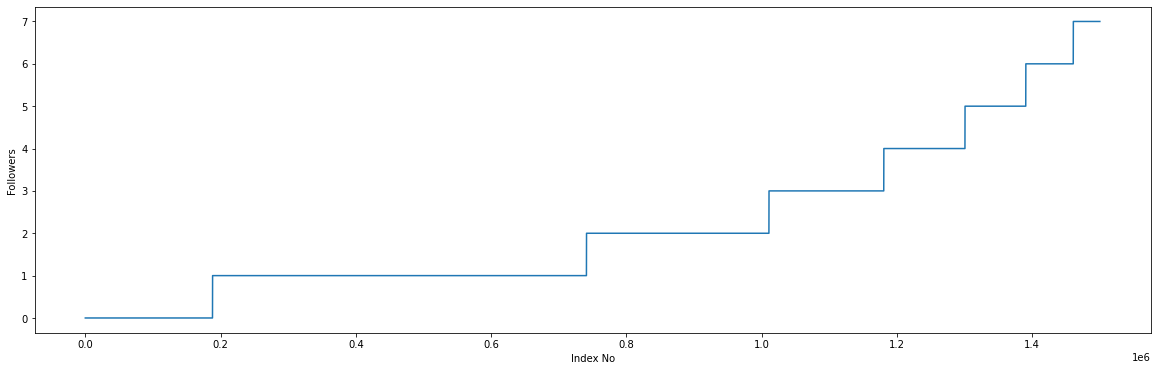

In [24]:
plt.figure(figsize=(20,6))
plt.plot(indegree[0:1500000])
plt.xlabel('Index No')
plt.ylabel('Followers')
plt.plot()

In [25]:
for i in range(0,11):
  print(90+i,'percentile value of indegree is ',np.percentile(indegree,90+i))

90 percentile value of indegree is  12.0
91 percentile value of indegree is  13.0
92 percentile value of indegree is  14.0
93 percentile value of indegree is  15.0
94 percentile value of indegree is  17.0
95 percentile value of indegree is  19.0
96 percentile value of indegree is  21.0
97 percentile value of indegree is  24.0
98 percentile value of indegree is  29.0
99 percentile value of indegree is  40.0
100 percentile value of indegree is  552.0


In [26]:
for i in range(0,11):
  print(90+i,'percentile value of outdegree is ',np.percentile(outdegree,90+i))

90 percentile value of outdegree is  12.0
91 percentile value of outdegree is  13.0
92 percentile value of outdegree is  14.0
93 percentile value of outdegree is  15.0
94 percentile value of outdegree is  17.0
95 percentile value of outdegree is  19.0
96 percentile value of outdegree is  21.0
97 percentile value of outdegree is  24.0
98 percentile value of outdegree is  29.0
99 percentile value of outdegree is  40.0
100 percentile value of outdegree is  1566.0


##### Conlusion:
#####  More than 99% of data have following and followers <= 40

C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

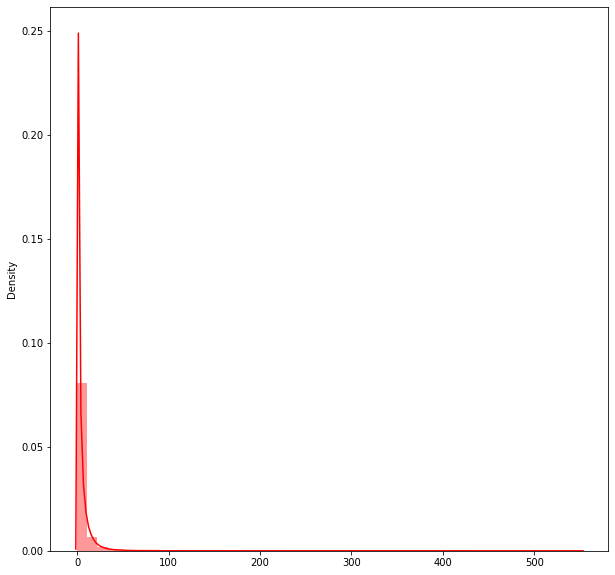

In [27]:
plt.figure(figsize=(10,10))
sns.distplot(indegree,color='r')

In [28]:
print('Average inDegree: ',np.sum(indegree)/len(indegree))
print('Average OutDegree: ',np.sum(outdegree)/len(outdegree))

Average inDegree:  5.067886178861789
Average OutDegree:  5.067886178861789


### Both Followers and Following

In [29]:
from collections import Counter
dict_in=dict(g.in_degree())
dict_out=dict(g.out_degree())
dict_in_out=Counter(dict_in)+Counter(dict_out)
in_out_d=np.array(list(dict_in_out.values()))


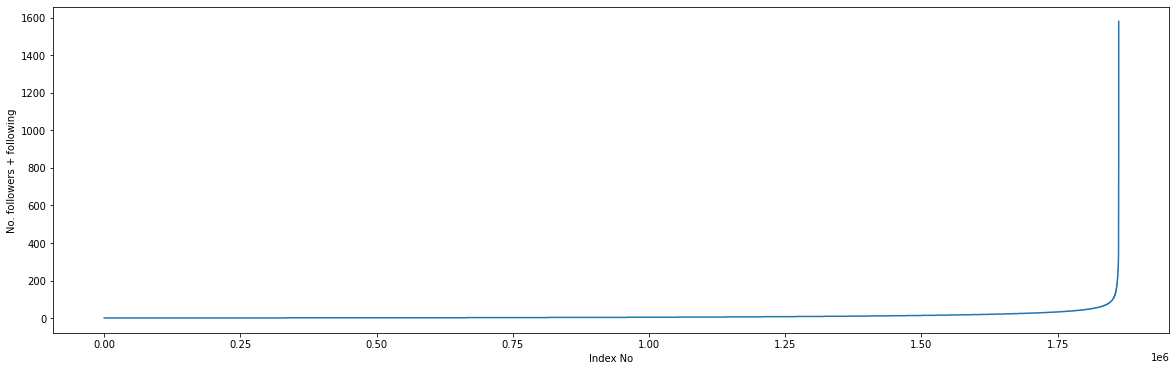

In [30]:
plt.figure(figsize=(20,6))
in_out_sorted=sorted(in_out_d)
plt.plot(in_out_sorted)
plt.xlabel('Index No')
plt.ylabel('No. followers + following')
plt.show()

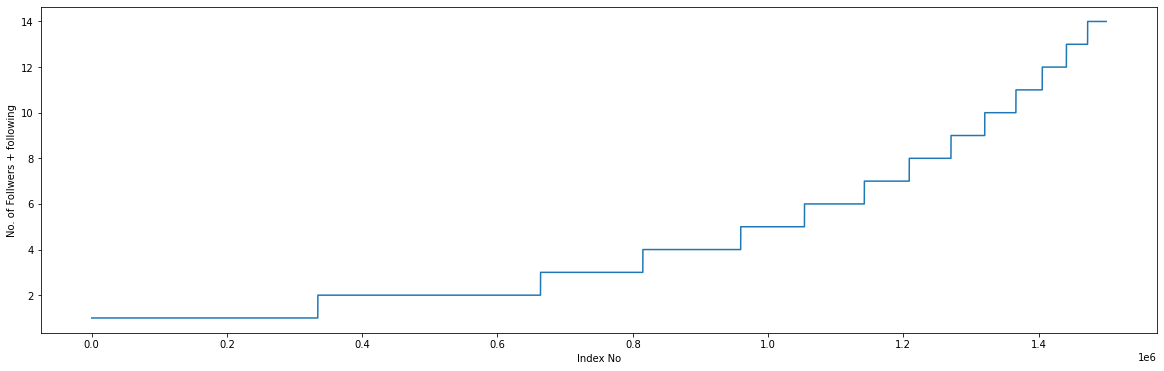

In [31]:
plt.figure(figsize=(20,6))
plt.xlabel('Index No')
plt.ylabel('No. of Follwers + following')
plt.plot(in_out_sorted[:1500000])
plt.show()

In [32]:
for i in range(1,11):
  print(90+i,' Percentile value is: ',np.percentile(in_out_sorted,90+i))

91  Percentile value is:  26.0
92  Percentile value is:  28.0
93  Percentile value is:  31.0
94  Percentile value is:  33.0
95  Percentile value is:  37.0
96  Percentile value is:  41.0
97  Percentile value is:  48.0
98  Percentile value is:  58.0
99  Percentile value is:  79.0
100  Percentile value is:  1579.0


In [33]:
print('Min no. follwers +following ',in_out_d.min())


Min no. follwers +following  1


In [34]:
print('Max no. of followers +following ',in_out_d.max())

Max no. of followers +following  1579


#### Strongly Connected: 
##### A graph is said to be strongly connected if every pair of vertices(u, v) in the graph contains a path between each other.
#### Weakly Connected:
#####  A graph is said to be weakly connected if there doesn’t exist any path between any two pairs of vertices.

In [35]:
print('No. of weakly connected components',len(list(nx.weakly_connected_components(g))))


No. of weakly connected components 45558


## Posing problem as Classification Problem

#### Given two userid we will classify them into 2 classes (binary classification) 
#### class 0: Link doesnt exist
#### class 1: Link does exist

##### The dataset already have class 1 data points. So we have to generate data points for class 0.
##### A directed graph can contain maximum of edges n*n-1= (n is  no. of nodes) 34,67,86,14,66,180. 


*  This can make dataset to large and we only have 
*  We only have 9437519 class 1 data points and the  rest will be class 0 which will result in imbalanced dataset

##### Solution: We will create 9437519 class 0 datapoints randomly





In [36]:
# import random
# r = csv.reader(open('/content/drive/MyDrive/FBR/train_woheader.csv','r'))
# edges = dict()
# for edge in r:
#         edges[(edge[0], edge[1])] = 1
        
        
# missing_edges = set([])

# for i in tqdm(range(9437519)):
#         a=random.randint(1, 1862220)
#         b=random.randint(1, 1862220)
#         tmp = edges.get((a,b),-1)
#         if tmp == -1 and a!=b:
#             try:
#                 if nx.shortest_path_length(g,source=a,target=b) > 2: 

#                     missing_edges.add((a,b))
#                 else:
#                     continue  
#             except:  
#                     missing_edges.add((a,b))              
#         else:
#             continue
# pickle.dump(missing_edges,open('conten/drive/MyDrive/FBR/missing_edges_final.p','wb'))




In [37]:
# pickle.dump(missing_edges,open('/content/drive/MyDrive/FBR/missing_edges_final.p','wb'))

In [38]:
missing_edges=pickle.load(open('missing_edges_final.p','rb'))
len(missing_edges)

9437186

In [39]:
df_pos=pd.read_csv('train.csv')
df_neg=pd.DataFrame(list(missing_edges),columns=['source_node','destination_node'])
print('Number of nodes in the graph with edges ',df_pos.shape[0])
print('Number of nodes in graph without edges ',df_neg.shape[0])
X_train_pos,X_test_pos,Y_train_pos,Y_test_pos=train_test_split(df_pos,np.ones(len(df_pos)),test_size=0.2)
X_train_neg,X_test_neg,Y_train_neg,Y_test_neg=train_test_split(df_neg,np.zeros(len(df_neg)),test_size=0.2)
print()
print()
print('Number of nodes in train data graph with edges ',X_train_pos.shape[0])
print('Number of nodes in test data graph without edges',X_test_pos.shape[0])
print()
print()
print('Number of nodes in test data with edges ',X_test_pos.shape[0])
print('Number of nodes in test datat without edges ',X_test_neg.shape[0])
X_train_pos.to_csv('train_pos_after_eda.csv',header=False, index=False)
X_test_pos.to_csv('test_pos_after_eda.csv',header=False, index=False)
X_train_neg.to_csv('train_neg_after_eda.csv',header=False, index=False)
X_test_neg.to_csv('test_neg_after_eda.csv',header=False, index=False)

Number of nodes in the graph with edges  9437519
Number of nodes in graph without edges  9437186


Number of nodes in train data graph with edges  7550015
Number of nodes in test data graph without edges 1887504


Number of nodes in test data with edges  1887504
Number of nodes in test datat without edges  1887438


In [41]:
X_train = X_train_pos.append(X_train_neg,ignore_index=True)
y_train = np.concatenate((Y_train_pos,Y_train_neg))
X_test = X_test_pos.append(X_test_neg,ignore_index=True)
y_test = np.concatenate((Y_test_pos,Y_test_neg)) 

X_train.to_csv('train_after_eda.csv',header=False,index=False)
X_test.to_csv('test_after_eda.csv',header=False,index=False)
pd.DataFrame(y_train.astype(int)).to_csv('train_y.csv',header=False,index=False)
pd.DataFrame(y_test.astype(int)).to_csv('test_y.csv',header=False,index=False)

C:\Users\Admin\AppData\Local\Temp\ipykernel_13596\4151979822.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train_pos.append(X_train_neg,ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13596\4151979822.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_test = X_test_pos.append(X_test_neg,ignore_index=True)


In [42]:
print("Data points in train data",X_train.shape)
print("Data points in test data",X_test.shape)
print("Shape of traget variable in train",y_train.shape)
print("Shape of traget variable in test", y_test.shape)

Data points in train data (15099763, 2)
Data points in test data (3774942, 2)
Shape of traget variable in train (15099763,)
Shape of traget variable in test (3774942,)
